<a href="https://colab.research.google.com/github/ARJUNPAYYATTILBINDESWAR/INSE-6220-Advanced-Statistical-Approaches-to-Quality/blob/main/Principal_Component_Analysis_and_Happiness_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and Happiness Classification**

**Install Pycaret**

In [ ]:
!pip install pycaret==3.2.0


**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


## **Dataset**

A feeling of happiness while self introspecting is the major reason we indulge in our hobbies and choose places to live.This Dataset is based on a survey conducted where people rated different metrics of their city on a scale of 5 and answered if they are happy or unhappy.The Happiness Classification Data Set” used for Principle Component Analysis (PCA)  is obtained from Kaggle. The goal of this dataset is to understand the important factors that play a role in making the residents of a city more happy with their lives.

There are 6 attributes and one column for classification.
**0 represents Unhappy and 1 represents Happy.**


All attributes are numerical and they are listed bellow:
Data Dictionary:-

infoavail = the availability of information about the city services
housecost = the cost of housing
schoolquality = the overall quality of public schools
policetrust = your trust in the local police
streetquality = the maintenance of streets and sidewalks
events = the availability of social community events
happy = decision attribute (D) with values 0 (unhappy) and 1 (happy)

The original dataset can be found on below link:
https://www.kaggle.com/datasets/priyanshusethi/happiness-classification-dataset





In [ ]:
from google.colab import files
uploaded = files.upload()

Saving happydata.csv to happydata (2).csv


In [ ]:
#read cvs file into dataframe
df = pd.read_csv('/content/happydata.csv')
df.head(25)

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0
5,5,5,3,5,5,5,1
6,3,1,2,2,1,3,0
7,5,4,4,4,4,5,1
8,4,1,4,4,4,4,0
9,4,4,4,2,5,5,0


In [ ]:
len(df.index)

143

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   ëvents         143 non-null    int64
 6   happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  18


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

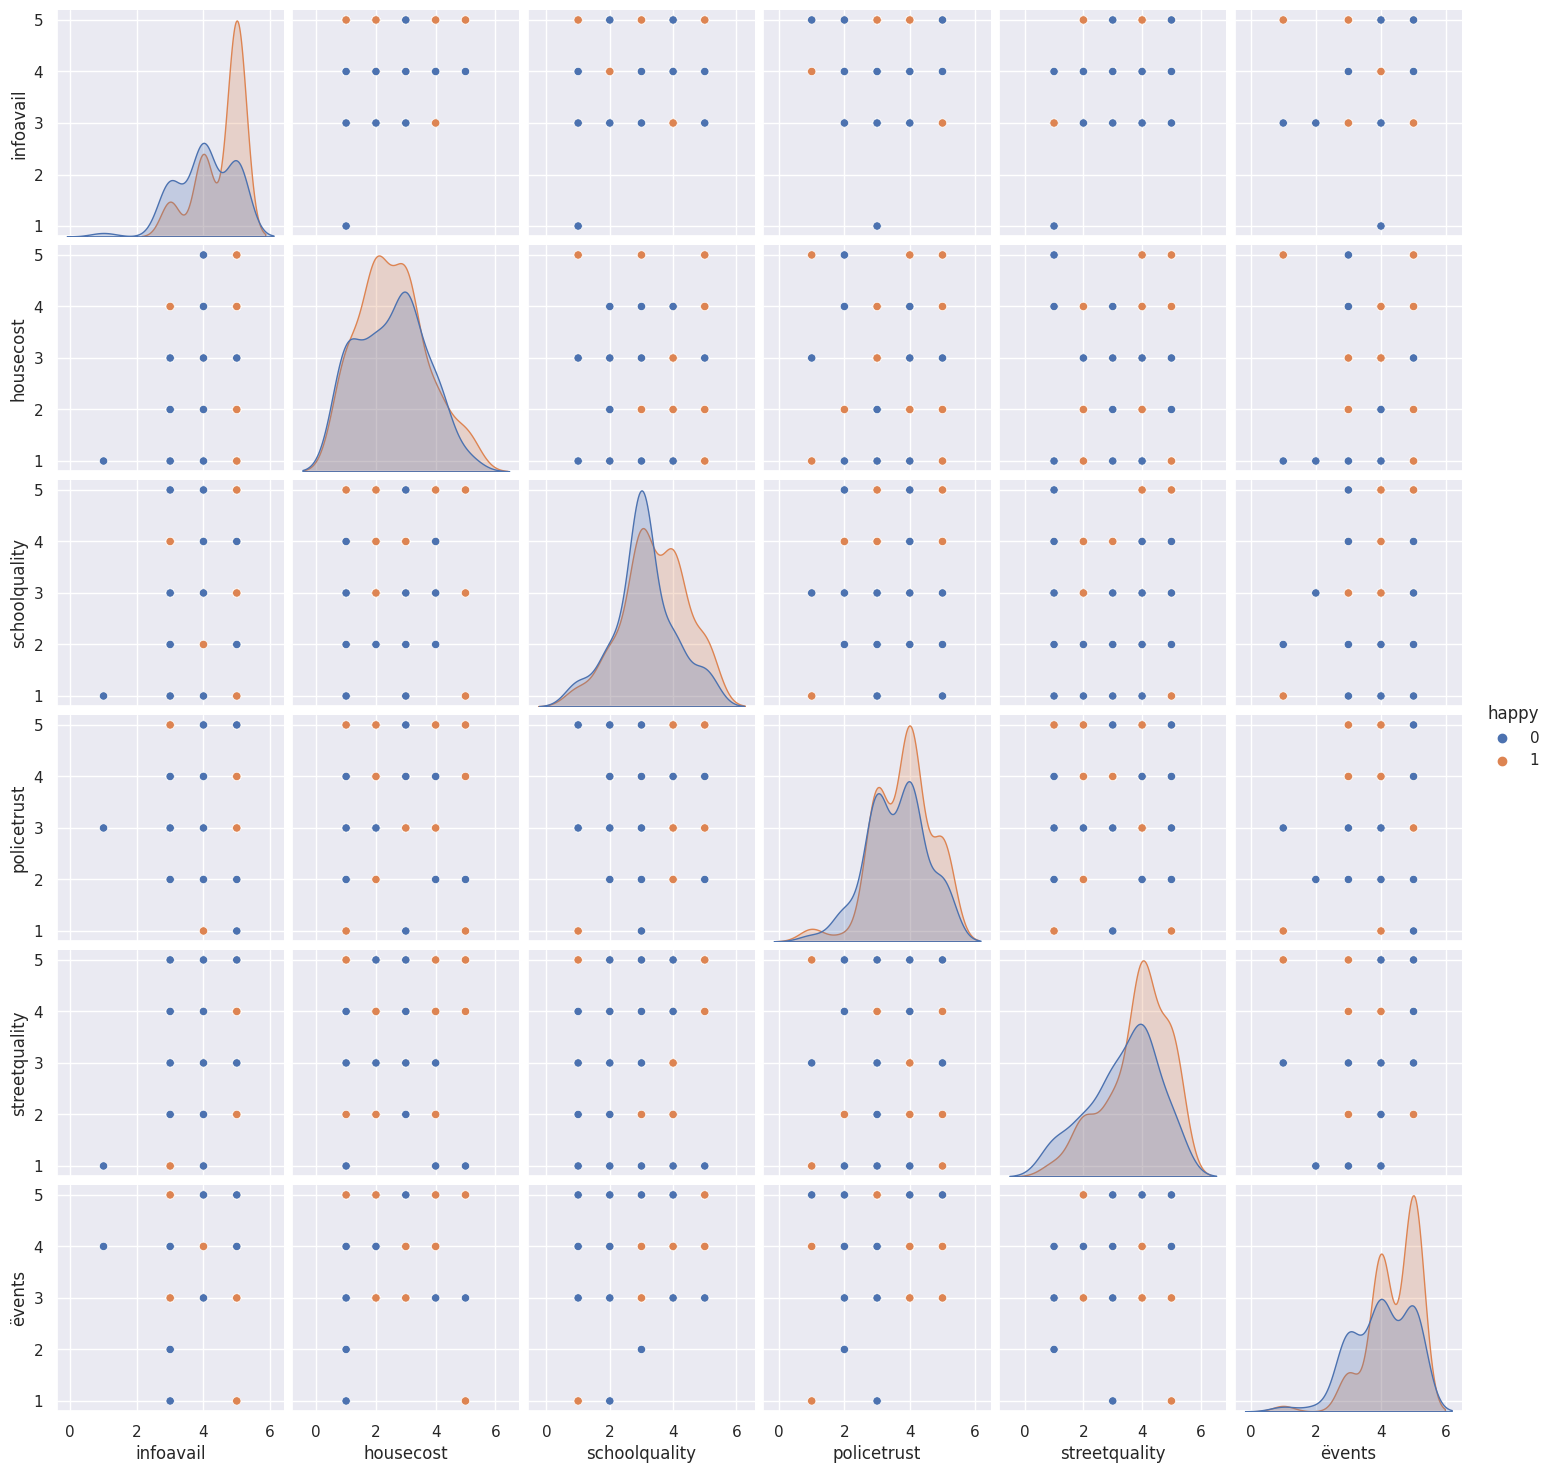

In [ ]:
sns.pairplot(df, hue='happy')
plt.show()

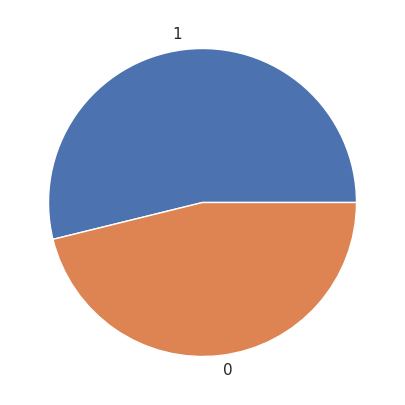

In [ ]:
y =df['happy']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['happy'])
X.head(10)

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5
5,5,5,3,5,5,5
6,3,1,2,2,1,3
7,5,4,4,4,4,5
8,4,1,4,4,4,4
9,4,4,4,2,5,5


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
infoavail,143.0,4.314685,0.799820,1.0,4.0,5.0,5.0,5.0
housecost,143.0,2.538462,1.118155,1.0,2.0,3.0,3.0,5.0
schoolquality,143.0,3.265734,0.992586,1.0,3.0,3.0,4.0,5.0
policetrust,143.0,3.699301,0.888383,1.0,3.0,4.0,4.0,5.0
streetquality,143.0,3.615385,1.131639,1.0,3.0,4.0,4.0,5.0
ëvents,143.0,4.216783,0.848693,1.0,4.0,4.0,5.0,5.0


**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents
0,-1.649504,0.414219,-0.268660,0.339669,-1.432491,-0.256330
1,-1.649504,-0.483255,-0.268660,1.469266,0.341069,-1.438754
2,0.859848,0.414219,-0.268660,-0.789928,-0.545711,0.926094
3,0.859848,1.311693,-0.268660,-0.789928,-0.545711,0.926094
4,0.859848,1.311693,-0.268660,-0.789928,-0.545711,0.926094
5,0.859848,2.209166,-0.268660,1.469266,1.227849,0.926094
6,-1.649504,-1.380729,-1.279671,-1.919525,-2.319271,-1.438754
7,0.859848,1.311693,0.742351,0.339669,0.341069,0.926094
8,-0.394828,-1.380729,0.742351,0.339669,0.341069,-0.256330
9,-0.394828,1.311693,0.742351,-1.919525,1.227849,0.926094


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
infoavail,143.0,-3.975064e-16,1.003515,-4.158855,-0.394828,0.859848,0.859848,0.859848
housecost,143.0,8.074349e-17,1.003515,-1.380729,-0.483255,0.414219,0.414219,2.209166
schoolquality,143.0,-9.316557e-17,1.003515,-2.290682,-0.268660,-0.268660,0.742351,1.753362
policetrust,143.0,1.863311e-16,1.003515,-3.049122,-0.789928,0.339669,0.339669,1.469266
streetquality,143.0,-3.726623e-17,1.003515,-2.319271,-0.545711,0.341069,0.341069,1.227849
ëvents,143.0,1.366428e-16,1.003515,-3.803602,-0.256330,-0.256330,0.926094,0.926094


**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

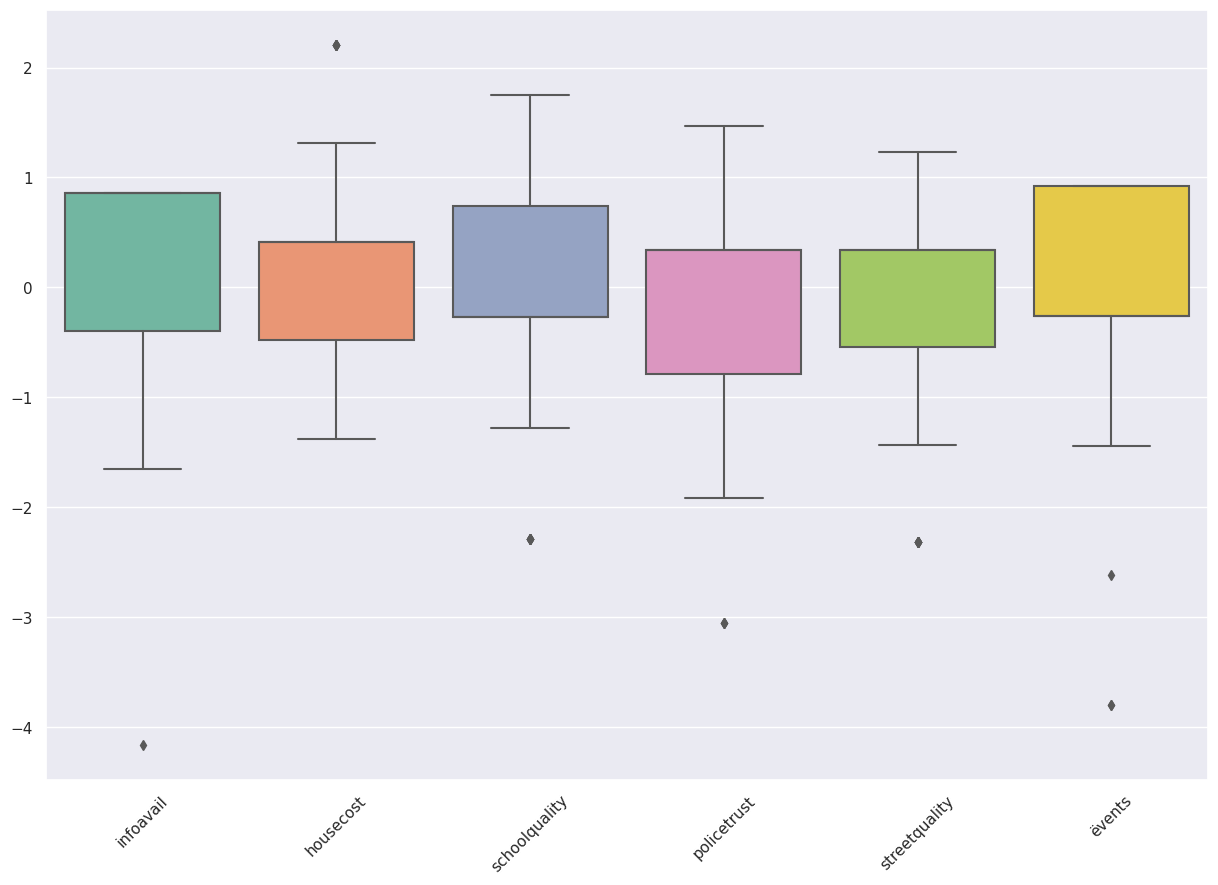

In [ ]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


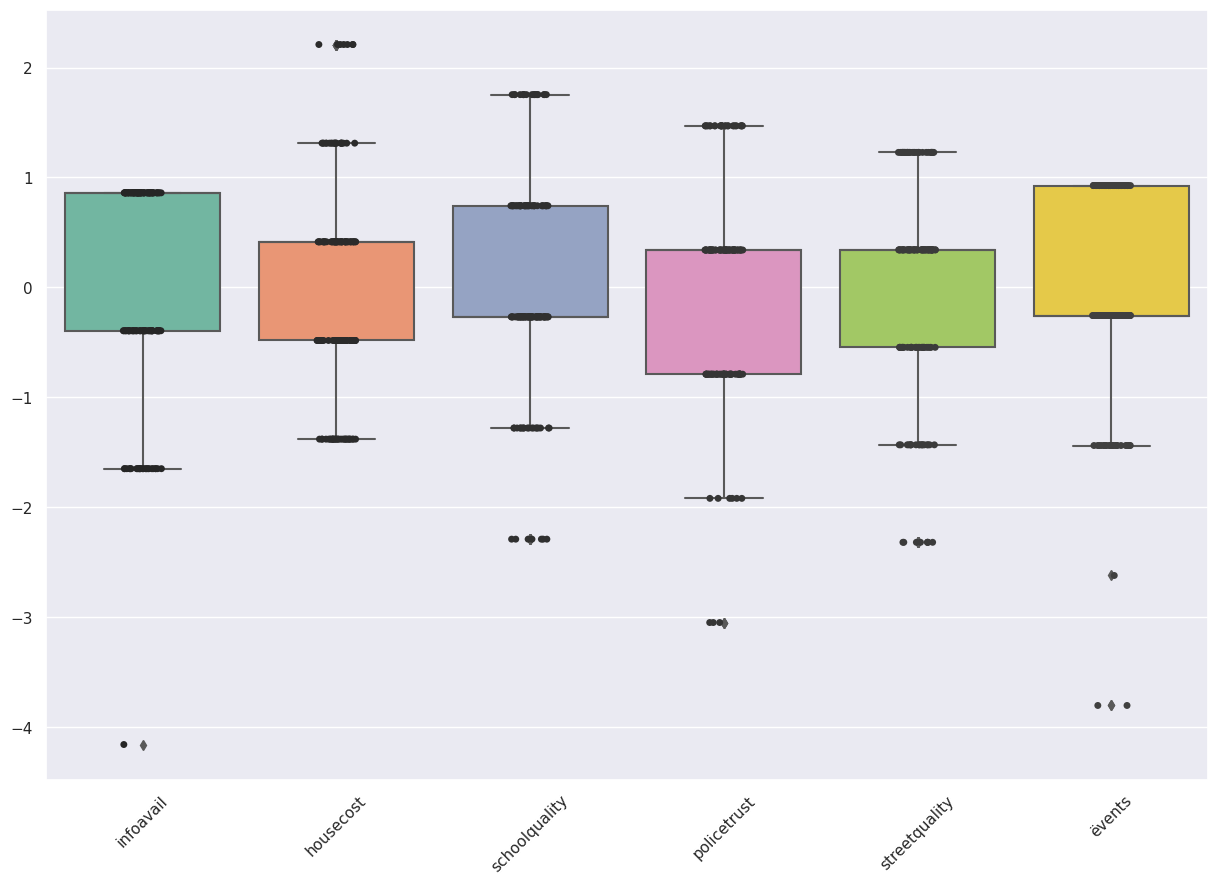

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

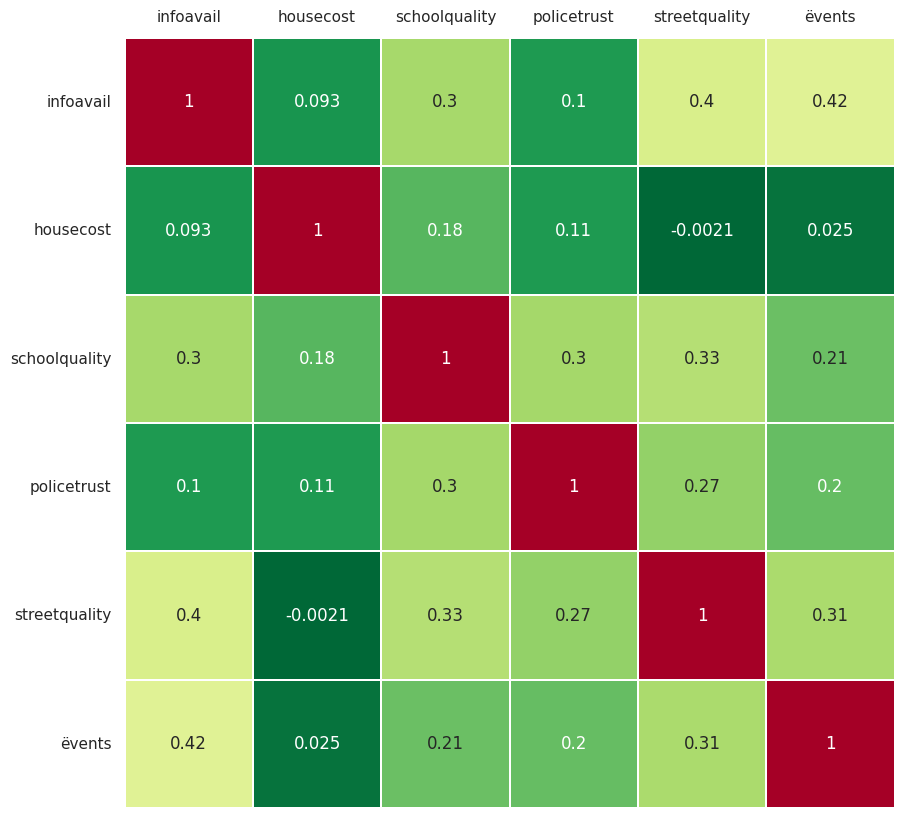

In [ ]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

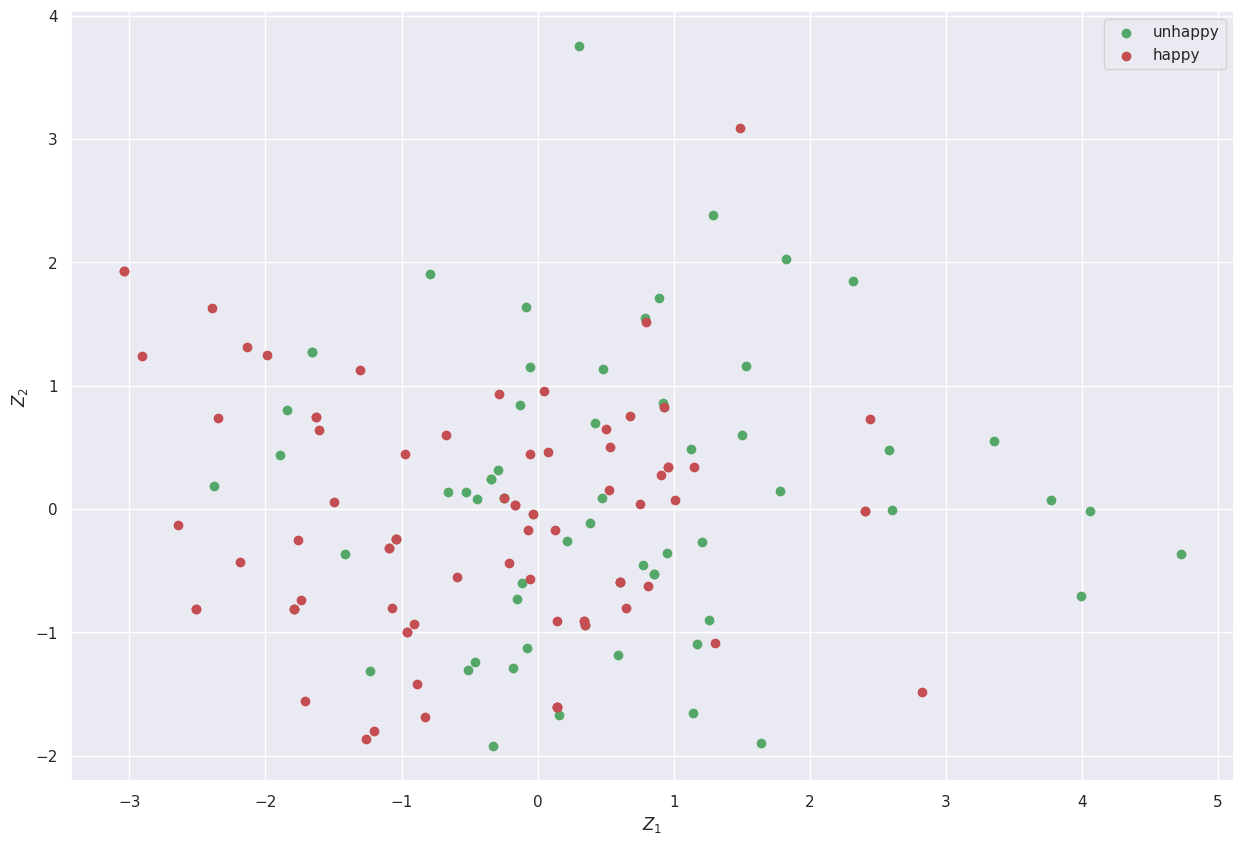

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# (happy)->1,  (unhappy)->0

idx_unhappy= np.where(y == 0)
idx_happy = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_unhappy,0], Z[idx_unhappy,1], c='g', label='unhappy')
plt.scatter(Z[idx_happy,0], Z[idx_happy,1], c='r', label='happy')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[-0.47725121, -0.26154808,  0.43044481,  0.11606678,  0.05028638,
         0.70890121],
       [-0.14716809,  0.76322962,  0.52670609, -0.15720534,  0.27655237,
        -0.13117951],
       [-0.44771623,  0.3036898 , -0.11765015,  0.51777851, -0.63283552,
        -0.15781552],
       [-0.35430864,  0.33152547, -0.6697835 , -0.42614013,  0.09750267,
         0.35333288],
       [-0.48285929, -0.20609683, -0.17555277,  0.33756743,  0.65027126,
        -0.39591382],
       [-0.4375332 , -0.32320367,  0.20982776, -0.63100968, -0.2969003 ,
        -0.41683737]])

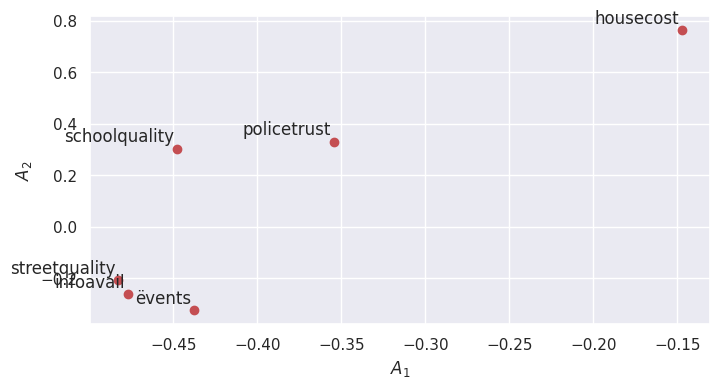

In [ ]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


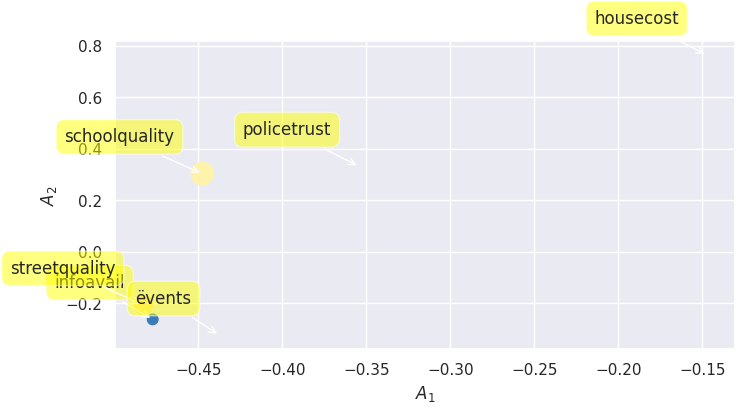

In [ ]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([2.19134285, 1.08472784, 0.91556991, 0.73463842, 0.61326373,
       0.50271077])

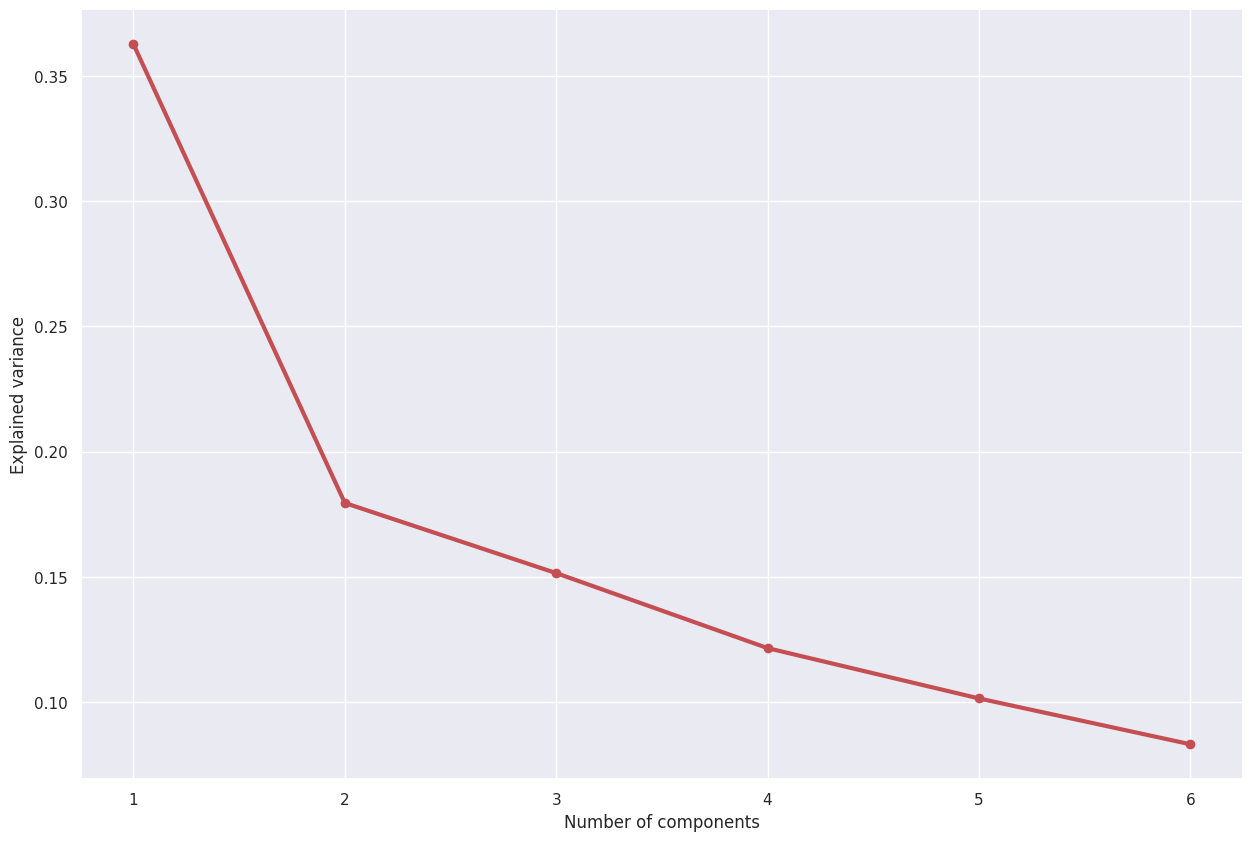

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

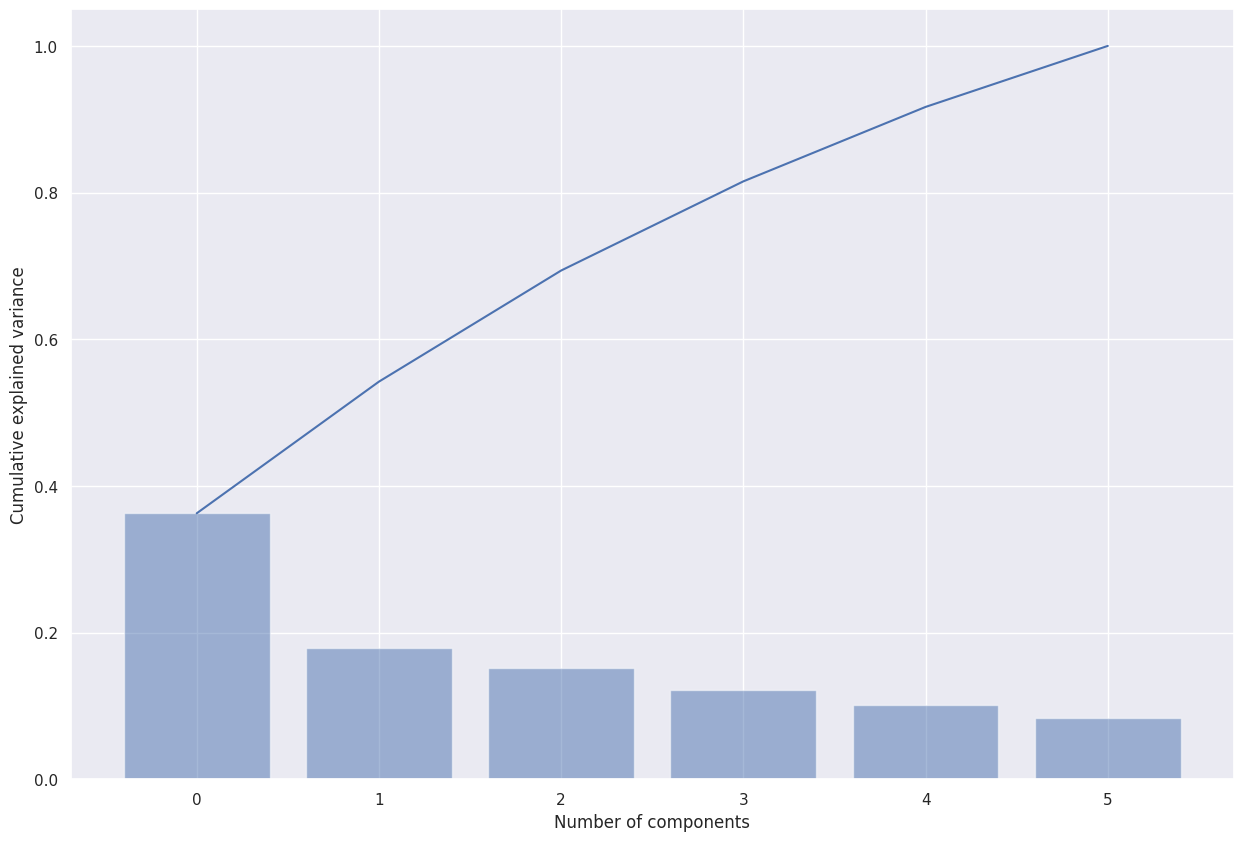

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([ 1.15666656,  0.86281671, -0.43906594,  0.24591267,  0.24591267,
        1.31434638, -0.70437829,  0.74467397, -0.59994006,  0.14108915,
        0.47936162,  1.14796201, -0.4335557 ,  0.84169246, -0.89930015,
        0.03870643,  0.43418549, -1.68475198, -1.92432935,  0.08503855,
       -0.59648533, -0.59648533,  1.26877845,  1.26877845, -0.80215029,
        0.27125586,  1.84931883,  0.60070517, -0.01465364, -0.01465364,
       -0.04026351, -0.04026351,  0.08849328, -1.2891376 ,  0.03103276,
        0.03103276, -1.48215646, -0.59648533, -0.31479476, -0.31479476,
       -0.94128197,  1.51348716, -0.52481002, -0.35971697,  0.07607357,
       -1.30680712,  0.82850856, -1.08525077,  0.05969536, -0.24733839,
       -0.36276969,  0.63780563, -1.60962194, -1.60962194, -1.60962194,
       -0.99977337, -0.99977337,  0.33871223,  0.33871223, -1.6741104 ,
        1.63775834,  0.74121924, -0.62657455,  0.75683325, -0.11090793,
       -0.80804582, -0.80804582,  0.8049435 , -0.90697381, -0.90

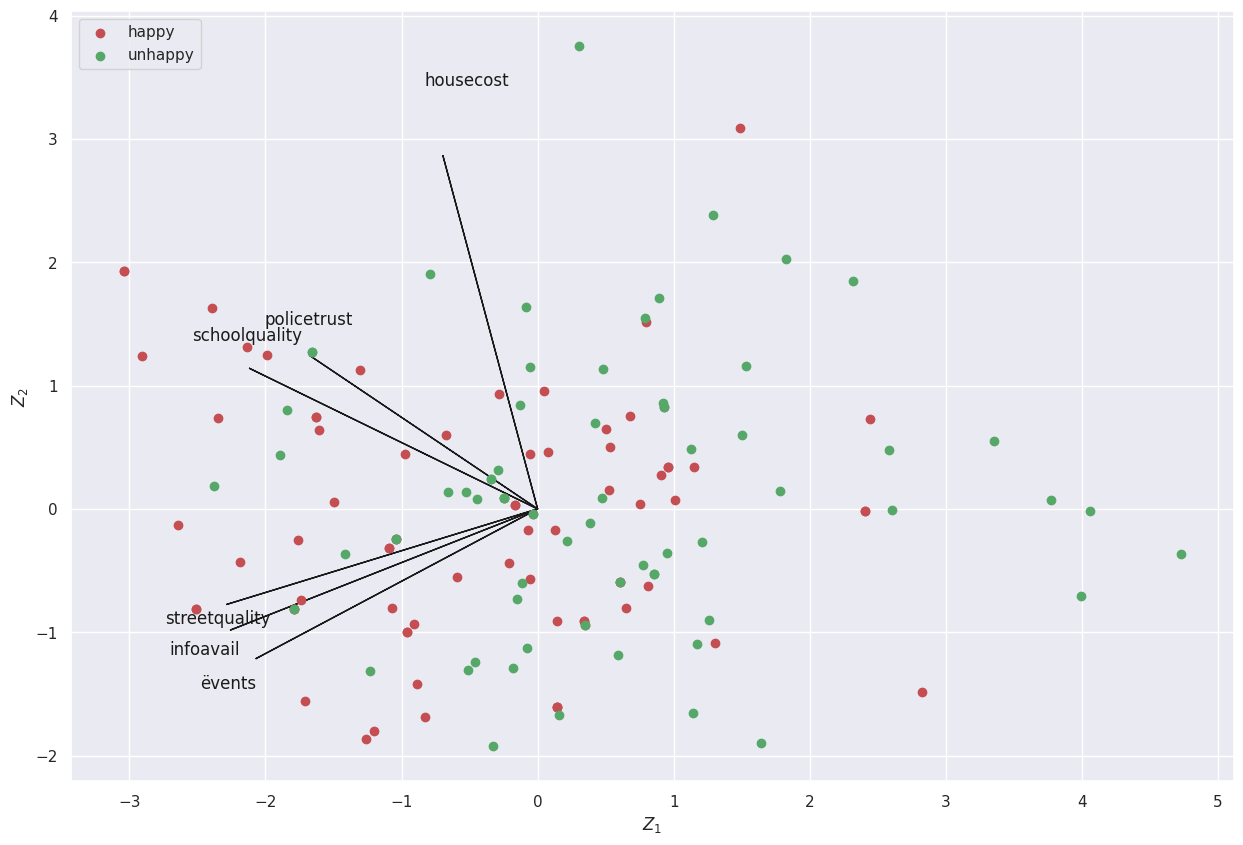

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_happy,0], Z[idx_happy,1], c='r', label='happy')
plt.scatter(Z[idx_unhappy,0], Z[idx_unhappy,1], c='g', label='unhappy')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [ ]:
!pip install pca

In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [ ]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.530048,1.156667,-0.490053,-0.862239,-0.620661,-0.387266
1,0.922871,0.862817,-2.278802,0.142299,0.745636,-0.079711
2,-0.212857,-0.439066,1.439098,-0.536393,-0.379028,0.148525
3,-0.344936,0.245913,1.911803,-0.677481,-0.130830,0.030795
4,-0.344936,0.245913,1.911803,-0.677481,-0.130830,0.030795
...,...,...,...,...,...,...
138,0.587595,-1.188046,2.952269,0.426340,-0.599306,-0.649722
139,-0.052813,-0.566792,0.365485,-1.176020,-1.093736,1.016467
140,-1.041273,-0.247338,0.526836,-0.718411,0.307758,0.196560
141,-0.442477,0.080820,-0.013232,-0.864038,0.244665,-0.692881


**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot:title={'center':'6 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (36.2% expl.var)', ylabel='PC2 (17.9% expl.var)'>)

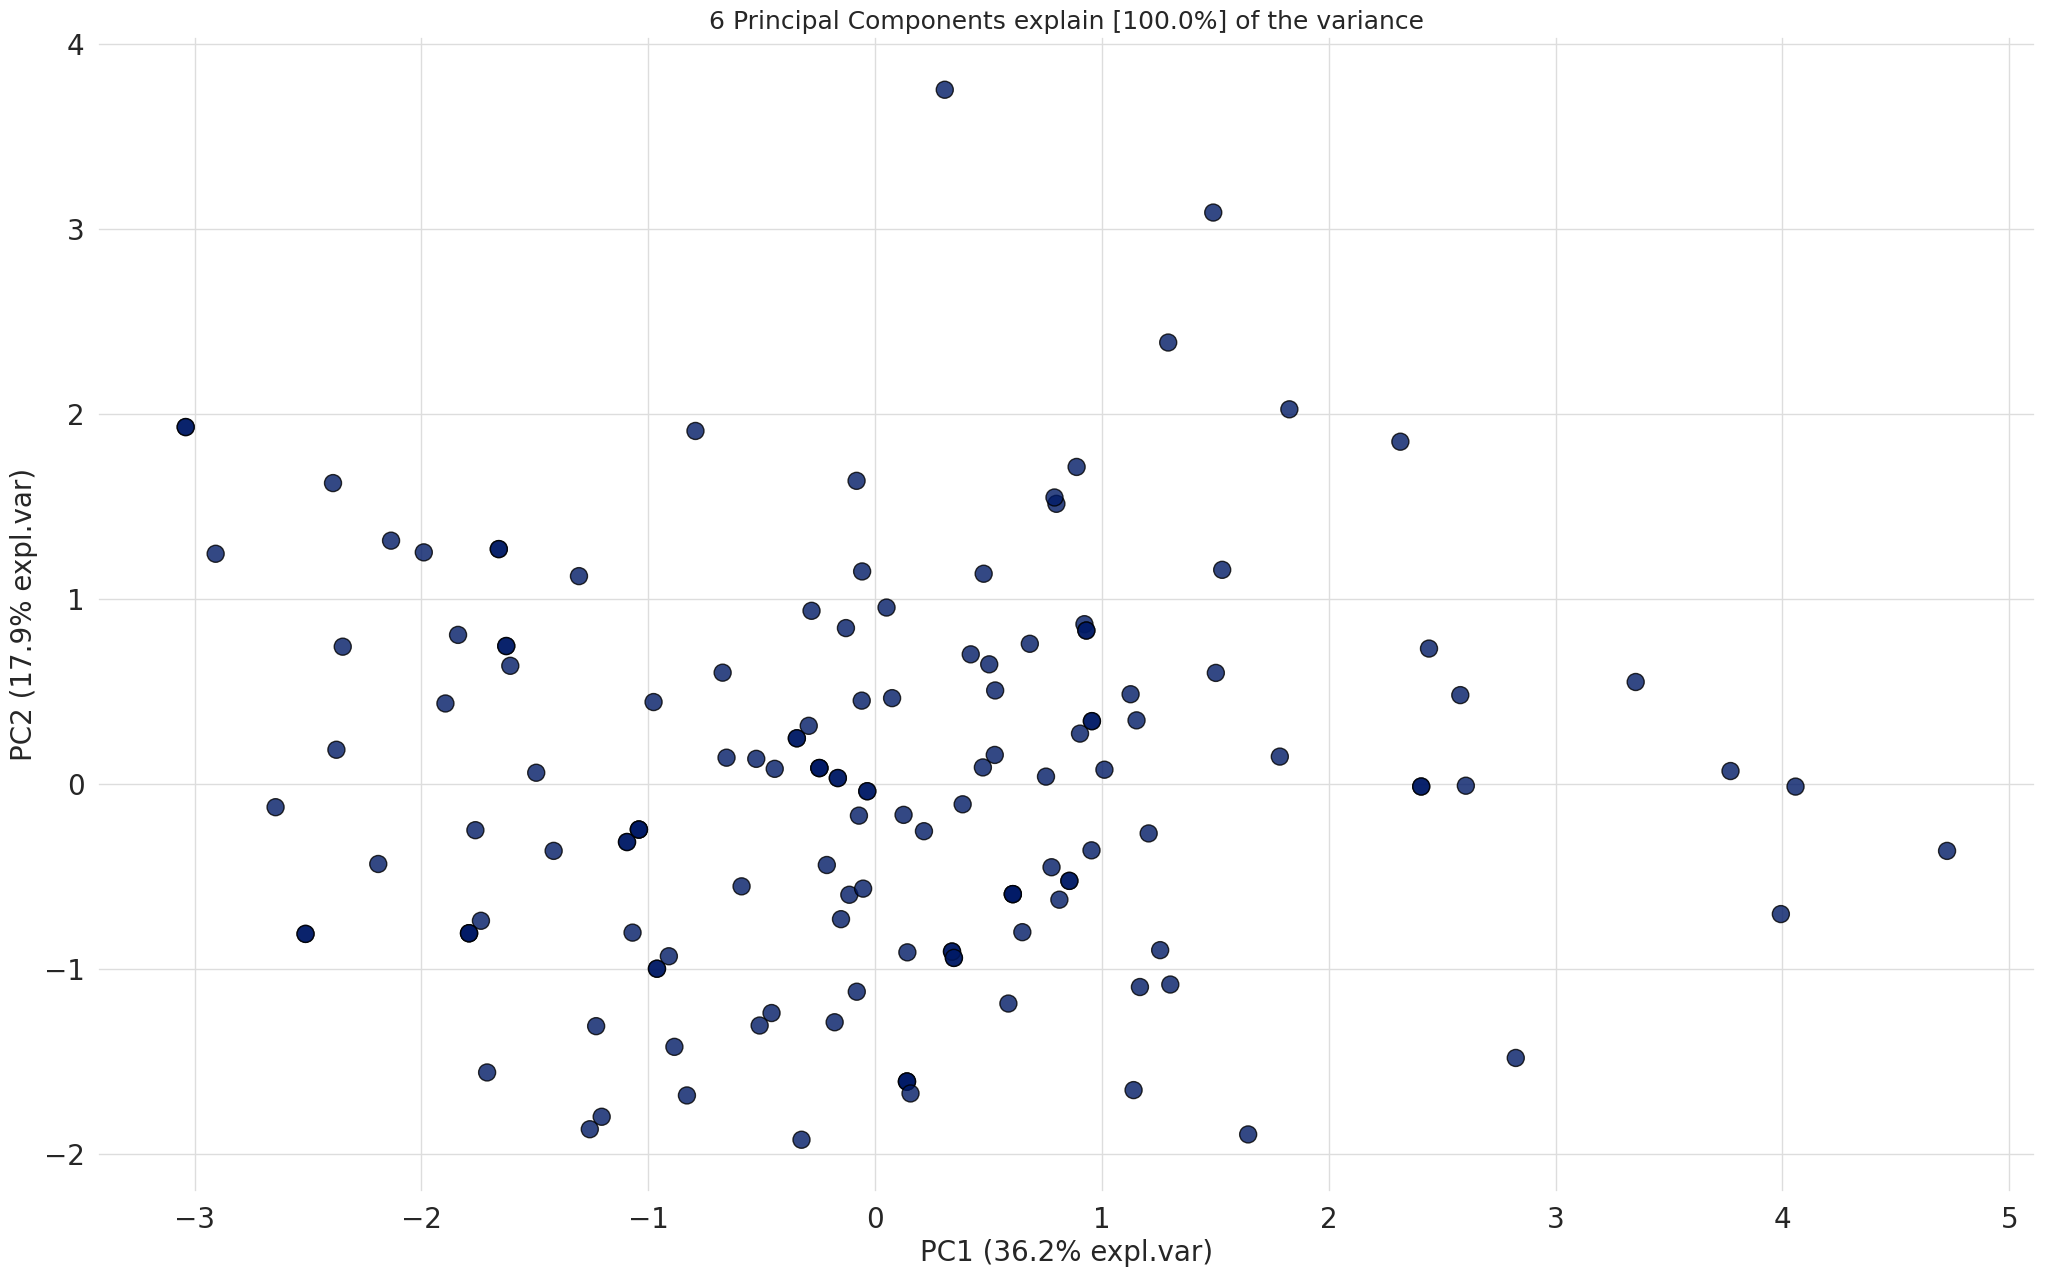

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T
A

,PC1,PC2,PC3,PC4,PC5,PC6
infoavail,-0.477251,-0.261548,0.430445,0.116067,0.050286,0.708901
housecost,-0.147168,0.763230,0.526706,-0.157205,0.276552,-0.131180
schoolquality,-0.447716,0.303690,-0.117650,0.517779,-0.632836,-0.157816
policetrust,-0.354309,0.331525,-0.669784,-0.426140,0.097503,0.353333
streetquality,-0.482859,-0.206097,-0.175553,0.337567,0.650271,-0.395914
ëvents,-0.437533,-0.323204,0.209828,-0.631010,-0.296900,-0.416837


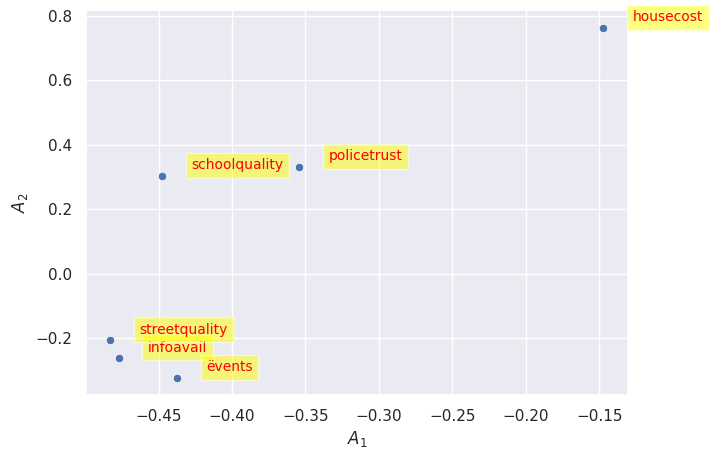

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))


**Scree Plot**

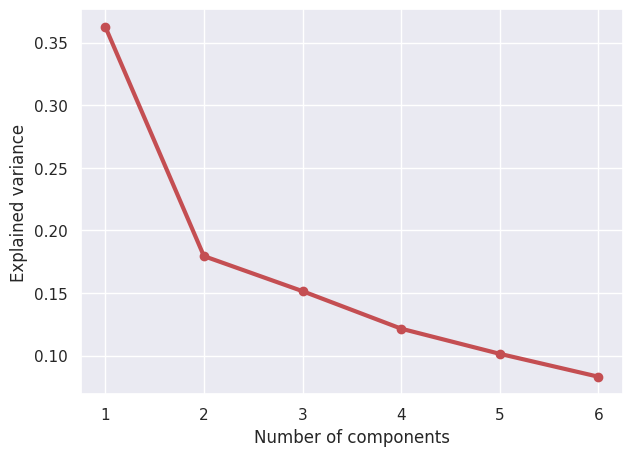

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

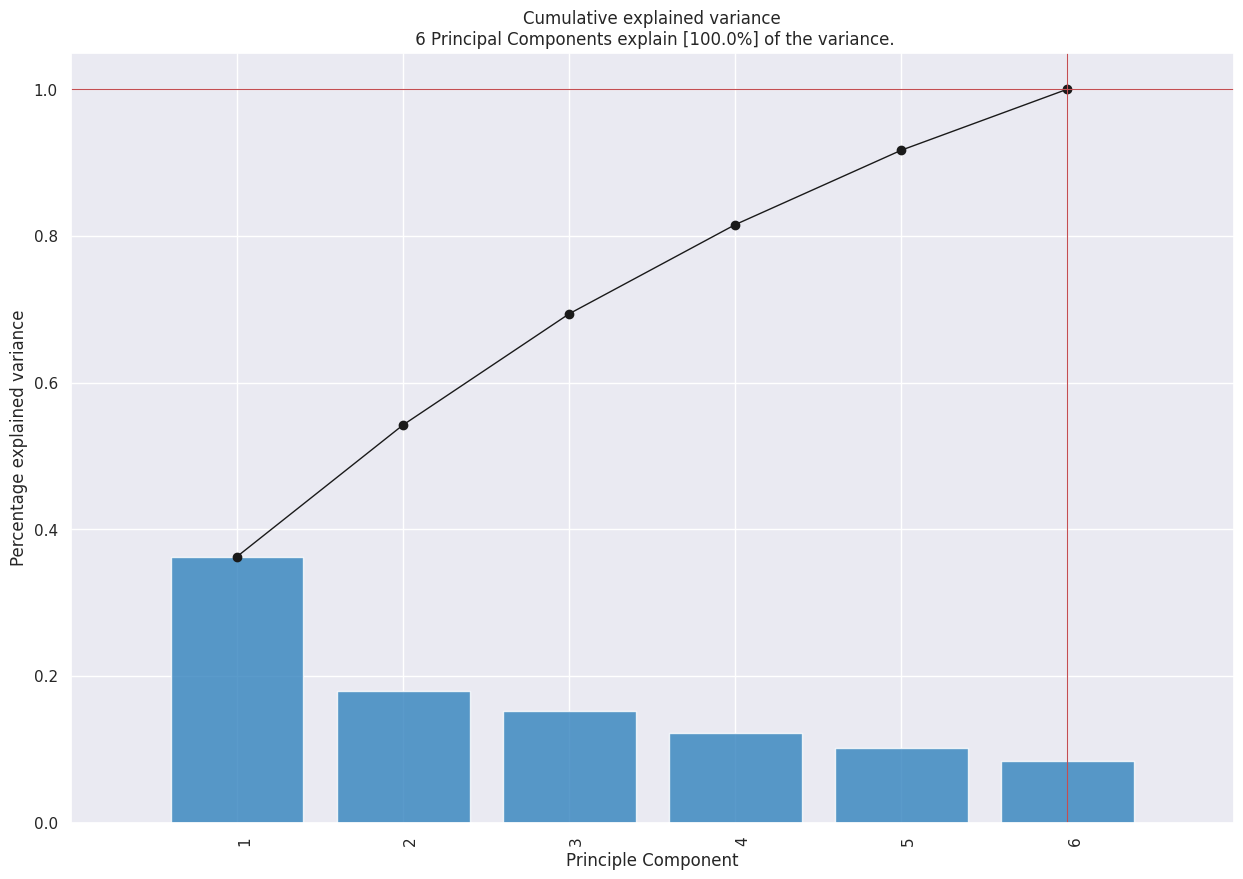

In [ ]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot:title={'center':'6 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (36.2% expl.var)', ylabel='PC2 (17.9% expl.var)'>)

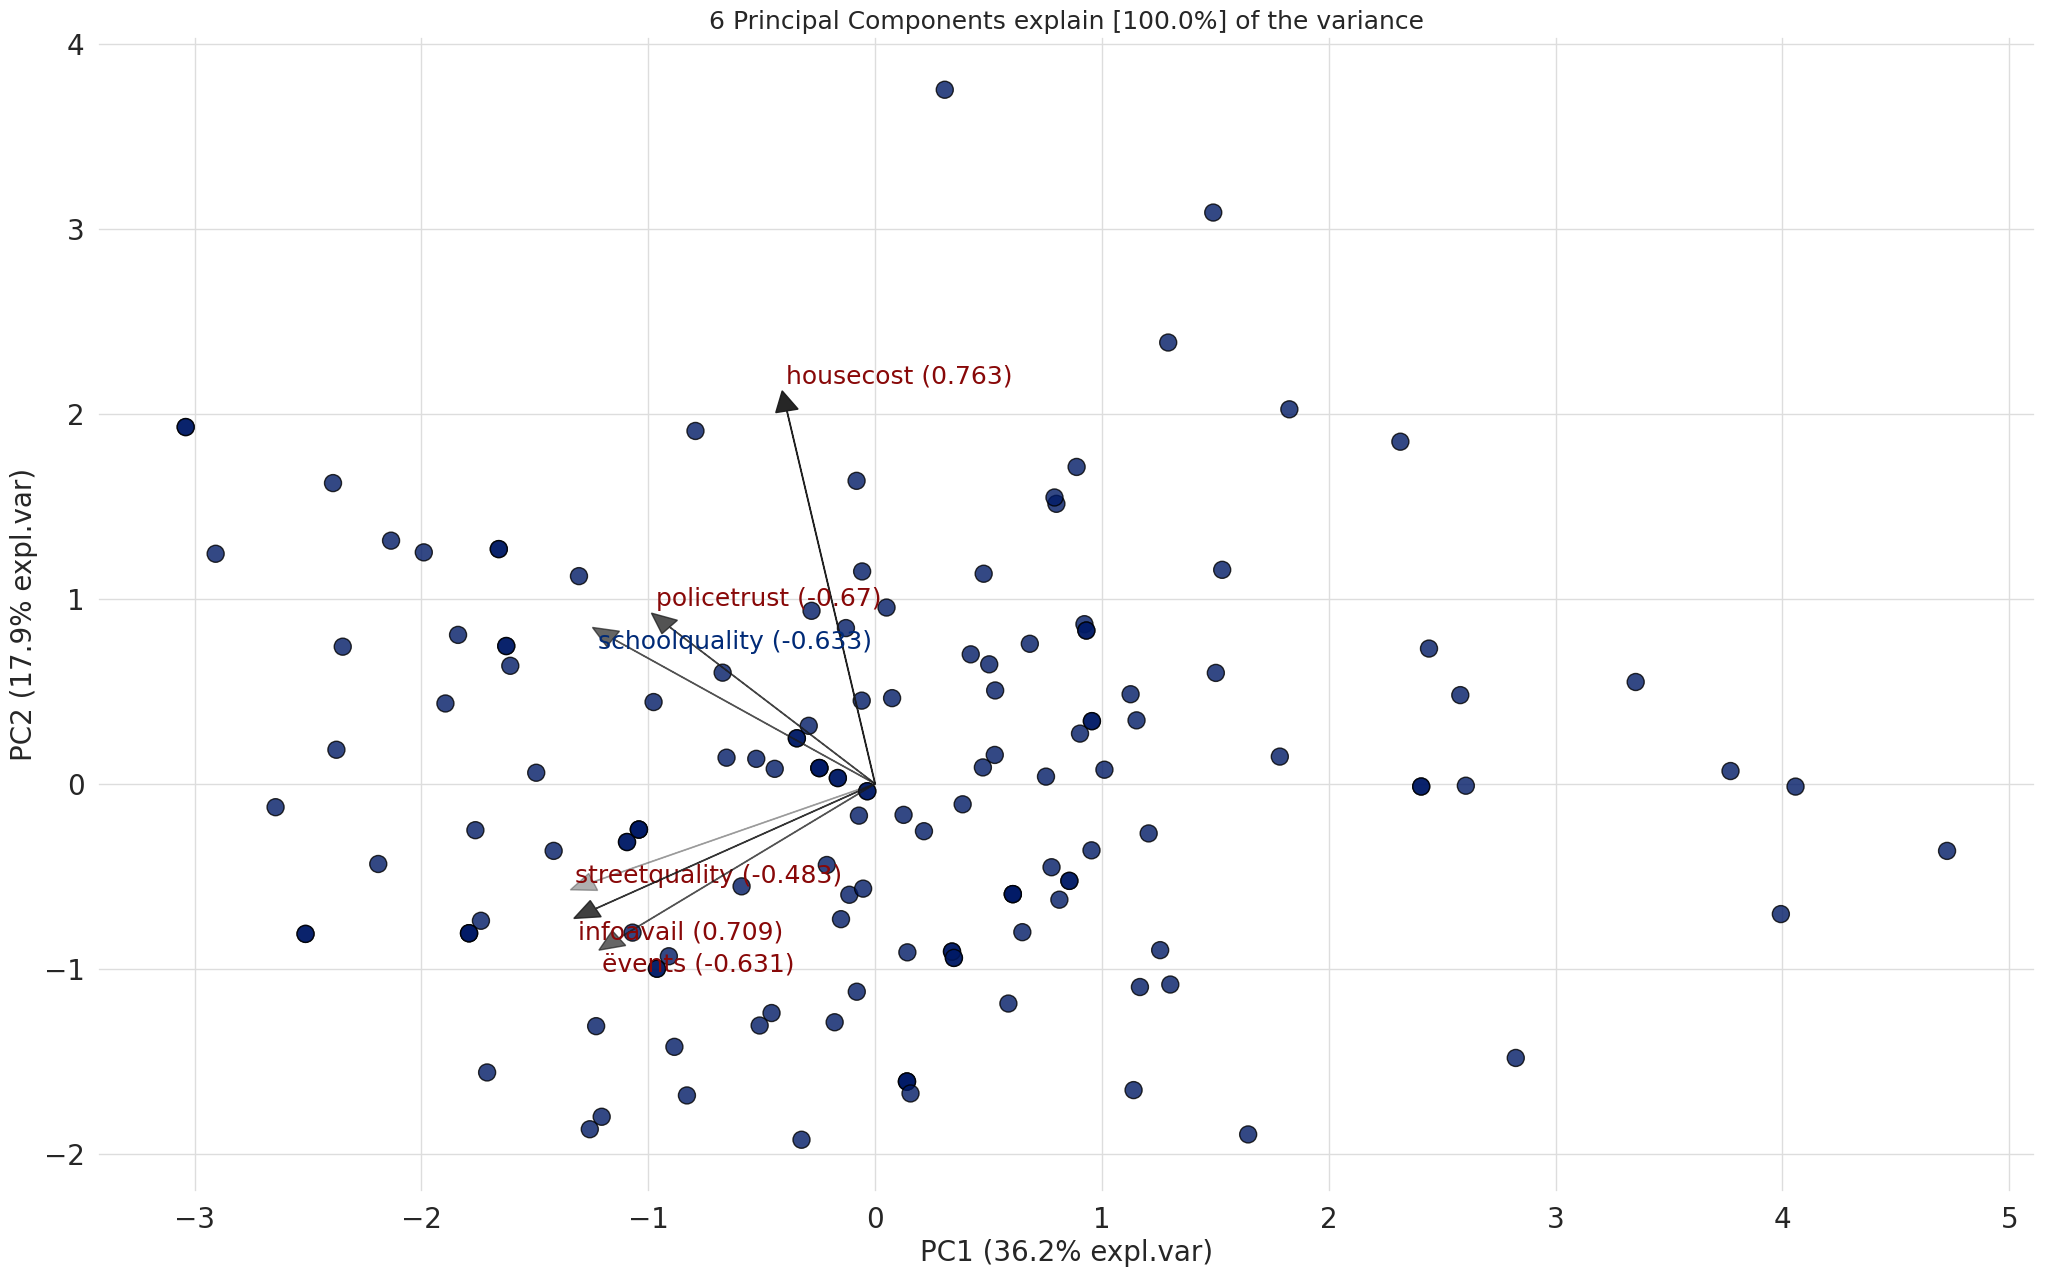

In [ ]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot:title={'center':'6 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (36.2% expl.var)', ylabel='PC2 (17.9% expl.var)'>)

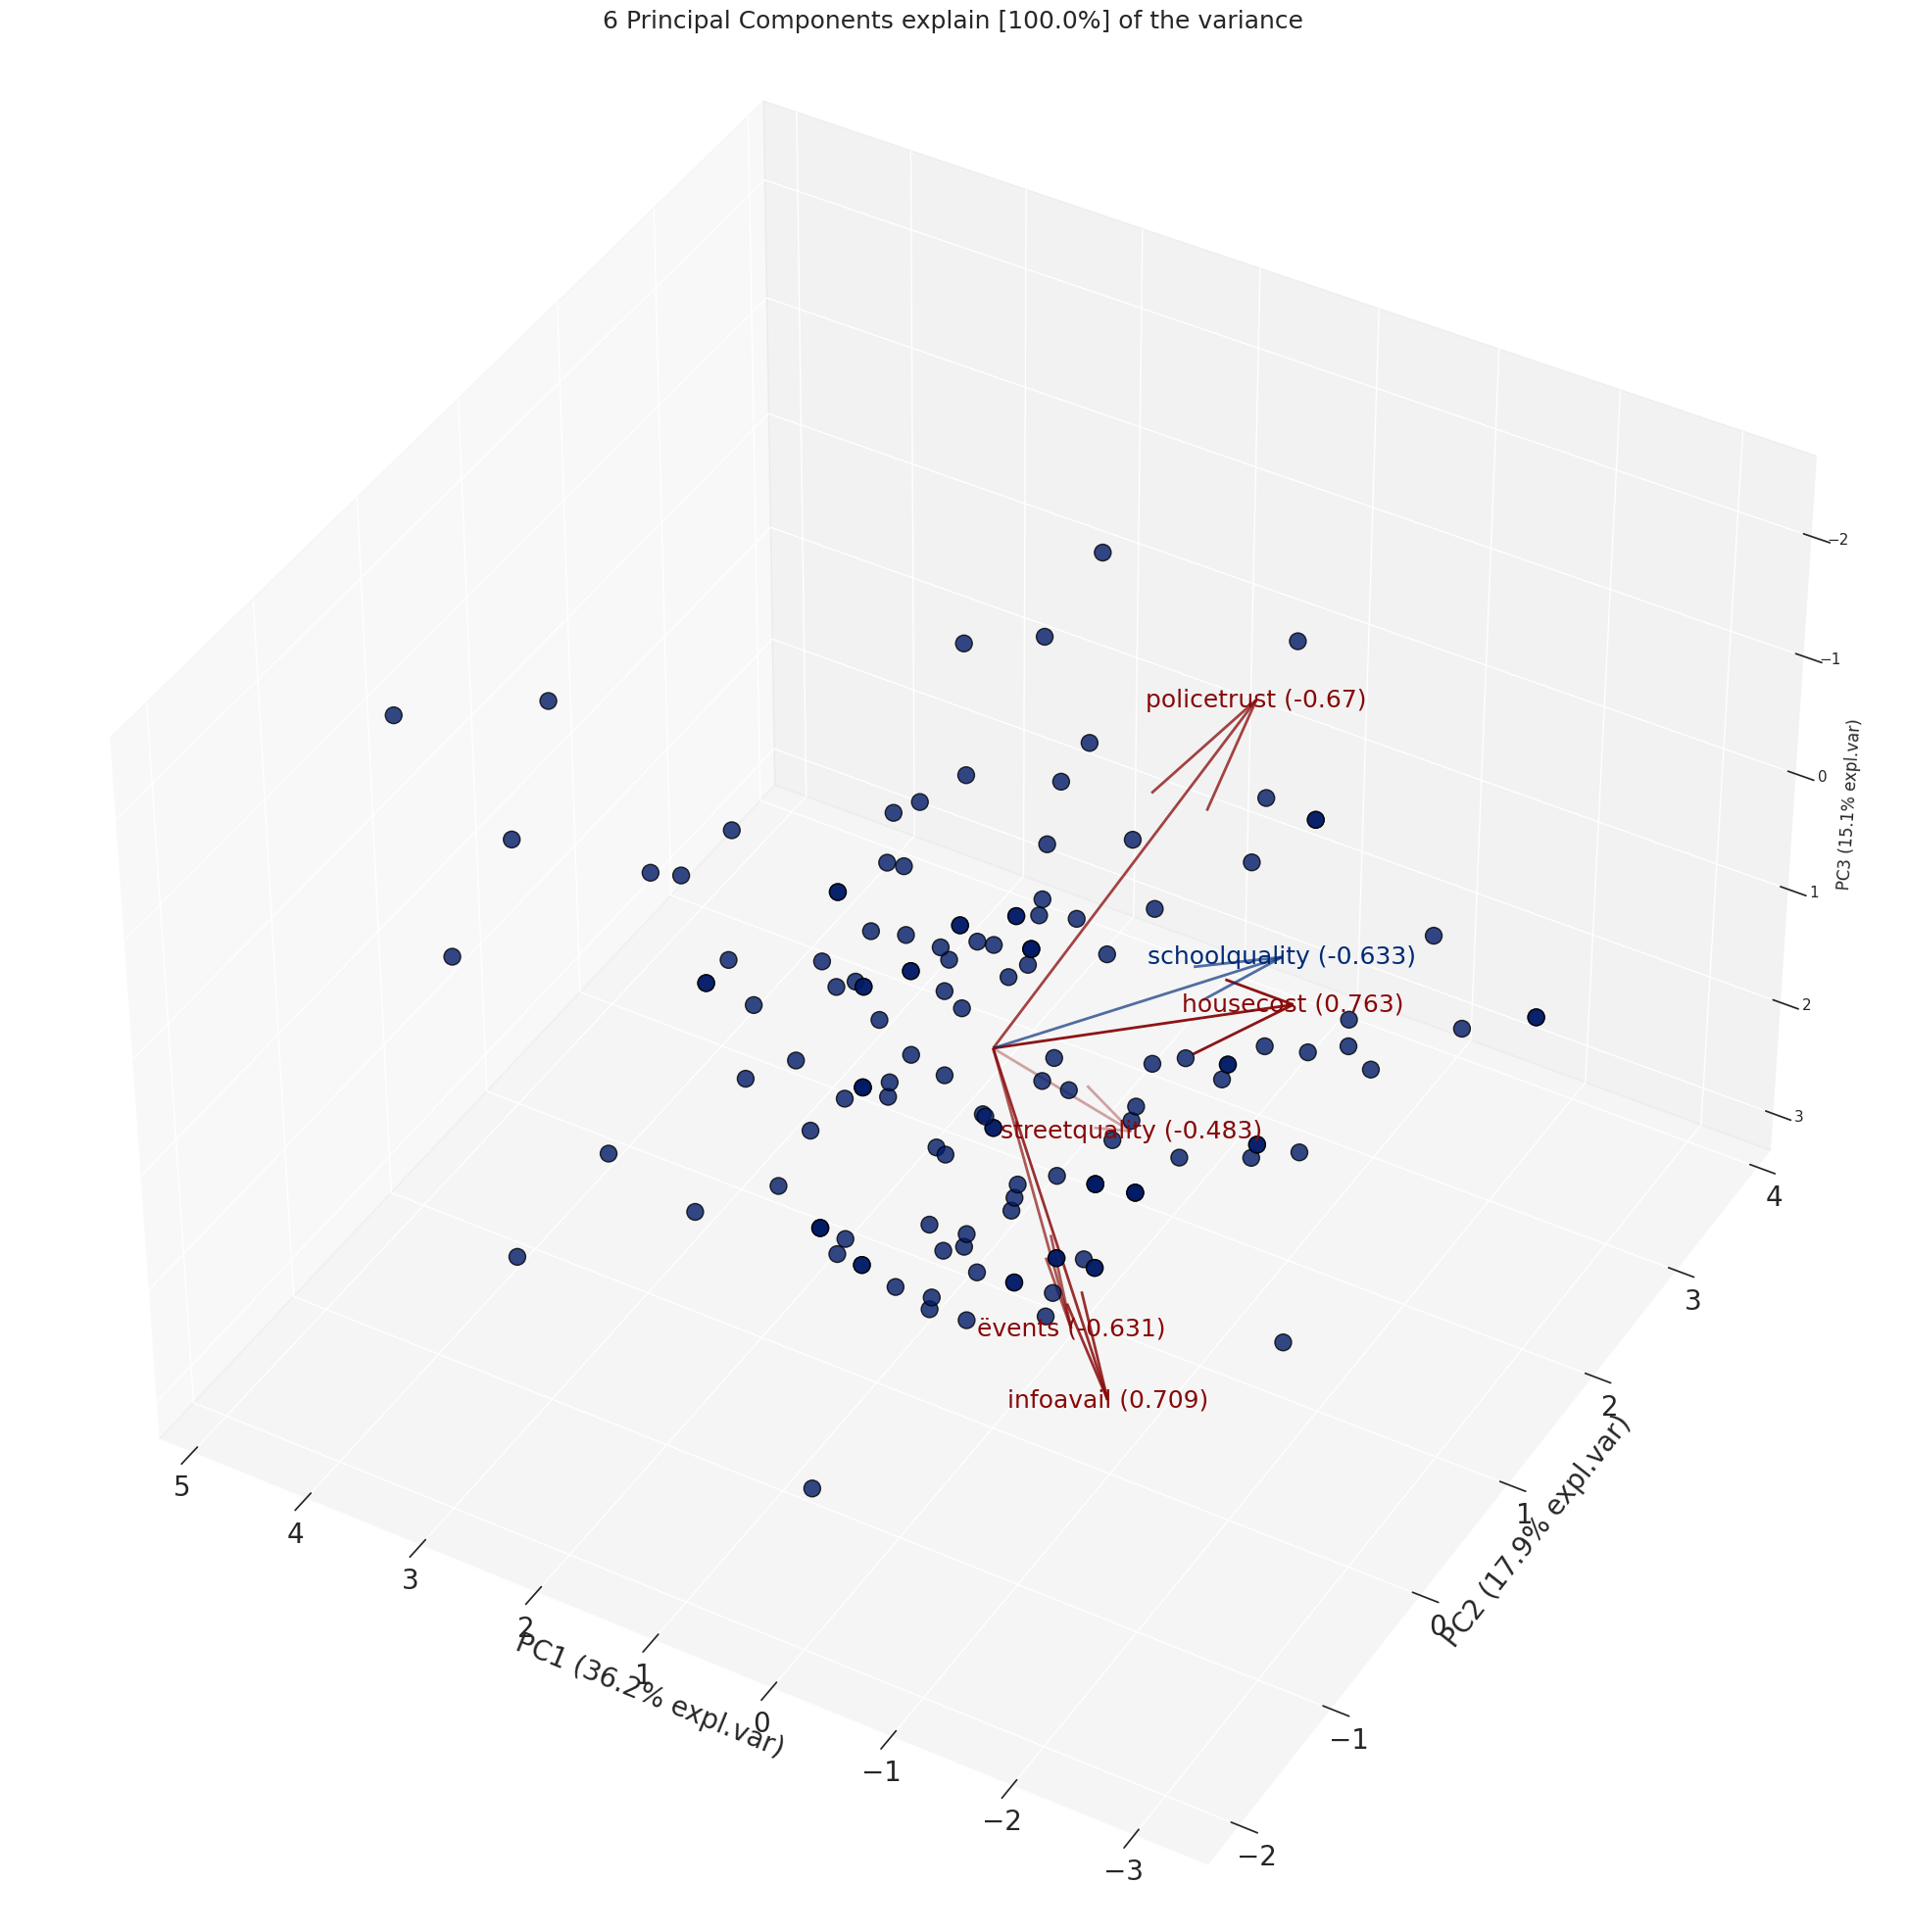

In [ ]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found.
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [ ]:
pip install pycaret

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.2.0'

In [ ]:
#For Google Colab only
#from pycaret.utils import enable_colab
#enable_colab()

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (129, 7)
Unseen Data For Predictions: (14, 7)


In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='happy', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,happy
2,Target type,Binary
3,Original data shape,"(129, 7)"
4,Transformed data shape,"(129, 7)"
5,Transformed train set shape,"(90, 7)"
6,Transformed test set shape,"(39, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


**Comparing All Models**

In [ ]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5667,0.6200,0.6300,0.5586,0.5806,0.1189,0.1377,0.0360
qda,Quadratic Discriminant Analysis,0.5667,0.5750,0.6150,0.5569,0.5739,0.1365,0.1449,0.0430
lr,Logistic Regression,0.5556,0.5800,0.5850,0.5171,0.5400,0.0918,0.0944,0.6620
ridge,Ridge Classifier,0.5556,0.0000,0.5850,0.5171,0.5400,0.0918,0.0944,0.0360
lda,Linear Discriminant Analysis,0.5556,0.5900,0.5850,0.5171,0.5400,0.0918,0.0944,0.0370
ada,Ada Boost Classifier,0.5444,0.5650,0.5850,0.5505,0.5632,0.0709,0.0742,0.1390
lightgbm,Light Gradient Boosting Machine,0.5444,0.5650,0.5100,0.5300,0.5077,0.0660,0.0492,0.2370
gbc,Gradient Boosting Classifier,0.5222,0.5700,0.5300,0.4846,0.4952,0.0463,0.0418,0.1220
rf,Random Forest Classifier,0.5111,0.4750,0.5700,0.5206,0.5359,0.0077,0.0100,0.2790
dummy,Dummy Classifier,0.5111,0.5000,1.0000,0.5111,0.6747,0.0000,0.0000,0.0600


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

GaussianNB(priors=None, var_smoothing=1e-09)

 Create a Model

**Logistic Regresssion**

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.5000,0.6000,0.5000,0.5455,-0.1538,-0.1581
1,0.8889,0.9500,1.0000,0.8333,0.9091,0.7692,0.7906
2,0.6667,0.7500,0.6000,0.7500,0.6667,0.3415,0.3500
3,0.2222,0.3500,0.2000,0.2500,0.2222,-0.5366,-0.5500
4,0.4444,0.2500,0.6000,0.5000,0.5455,-0.1538,-0.1581
5,0.4444,0.6000,0.6000,0.5000,0.5455,-0.1538,-0.1581
6,0.6667,0.7000,1.0000,0.5714,0.7273,0.3721,0.4781
7,0.4444,0.4500,0.0000,0.0000,0.0000,-0.2162,-0.3162
8,0.6667,0.6500,0.7500,0.6000,0.6667,0.3415,0.3500


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the model**

In [ ]:
tuned_lr=tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.5000,0.6000,0.5000,0.5455,-0.1538,-0.1581
1,0.7778,0.9500,1.0000,0.7143,0.8333,0.5263,0.5976
2,0.6667,0.8000,0.6000,0.7500,0.6667,0.3415,0.3500
3,0.2222,0.2500,0.4000,0.3333,0.3636,-0.6154,-0.6325
4,0.4444,0.3000,0.6000,0.5000,0.5455,-0.1538,-0.1581
5,0.5556,0.6000,0.6000,0.6000,0.6000,0.1000,0.1000
6,0.6667,0.8000,1.0000,0.5714,0.7273,0.3721,0.4781
7,0.6667,0.6000,0.5000,0.6667,0.5714,0.3077,0.3162
8,0.6667,0.6500,0.7500,0.6000,0.6667,0.3415,0.3500


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_lr

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**


In [ ]:
pip install "schemdraw<0.16"

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

**Create model with K-nearest neighbour**

In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3333,0.5500,0.4000,0.4000,0.4000,-0.3500,-0.3500
1,0.4444,0.3500,0.6000,0.5000,0.5455,-0.1538,-0.1581
2,0.4444,0.3500,0.6000,0.5000,0.5455,-0.1538,-0.1581
3,0.3333,0.4250,0.6000,0.4286,0.5000,-0.4211,-0.4781
4,0.3333,0.3500,0.4000,0.4000,0.4000,-0.3500,-0.3500
5,0.3333,0.2750,0.6000,0.4286,0.5000,-0.4211,-0.4781
6,0.4444,0.5250,0.5000,0.4000,0.4444,-0.0976,-0.1000
7,0.4444,0.3000,0.2500,0.3333,0.2857,-0.1538,-0.1581
8,0.6667,0.6500,0.7500,0.6000,0.6667,0.3415,0.3500


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune model with K-nearest neighbour**

In [ ]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5556,0.5000,0.6000,0.6000,0.6000,0.1000,0.1000
1,0.6667,0.6250,0.6000,0.7500,0.6667,0.3415,0.3500
2,0.5556,0.5000,0.6000,0.6000,0.6000,0.1000,0.1000
3,0.3333,0.2750,0.4000,0.4000,0.4000,-0.3500,-0.3500
4,0.6667,0.6250,0.6000,0.7500,0.6667,0.3415,0.3500
5,0.5556,0.5750,0.8000,0.5714,0.6667,0.0526,0.0598
6,0.7778,0.8750,1.0000,0.6667,0.8000,0.5714,0.6325
7,0.6667,0.5000,0.5000,0.6667,0.5714,0.3077,0.3162
8,0.5556,0.5500,0.5000,0.5000,0.5000,0.1000,0.1000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

**Evaluate model with K-nearest neighbour**

In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Quadratic Discriminant Analysis**

In [ ]:
qda=create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3333,0.4500,0.2000,0.3333,0.2500,-0.2857,-0.3162
1,0.4444,0.5500,0.4000,0.5000,0.4444,-0.0976,-0.1000
2,0.6667,0.8000,0.6000,0.7500,0.6667,0.3415,0.3500
3,0.5556,0.3000,0.8000,0.5714,0.6667,0.0526,0.0598
4,0.4444,0.3500,0.4000,0.5000,0.4444,-0.0976,-0.1000
5,0.7778,0.7500,1.0000,0.7143,0.8333,0.5263,0.5976
6,0.6667,0.7000,0.7500,0.6000,0.6667,0.3415,0.3500
7,0.5556,0.3500,0.7500,0.5000,0.6000,0.1429,0.1581
8,0.5556,0.6500,0.5000,0.5000,0.5000,0.1000,0.1000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune QDA Model**

In [ ]:
tuned_qda=tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.5000,0.6000,0.5000,0.5455,-0.1538,-0.1581
1,0.7778,0.9500,1.0000,0.7143,0.8333,0.5263,0.5976
2,0.6667,0.8000,0.6000,0.7500,0.6667,0.3415,0.3500
3,0.3333,0.3500,0.6000,0.4286,0.5000,-0.4211,-0.4781
4,0.4444,0.3500,0.6000,0.5000,0.5455,-0.1538,-0.1581
5,0.5556,0.6500,0.6000,0.6000,0.6000,0.1000,0.1000
6,0.6667,0.8000,1.0000,0.5714,0.7273,0.3721,0.4781
7,0.6667,0.5500,0.5000,0.6667,0.5714,0.3077,0.3162
8,0.6667,0.6500,0.7500,0.6000,0.6667,0.3415,0.3500


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate QDA Model**

In [ ]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<Figure size 800x550 with 0 Axes>

In [ ]:
!pip install statsmodels --upgrade

# **Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='happy', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,happy
2,Target type,Binary
3,Original data shape,"(129, 7)"
4,Transformed data shape,"(129, 4)"
5,Transformed train set shape,"(90, 4)"
6,Transformed test set shape,"(39, 4)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


# **Comparing Models**

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6000,0.6150,0.6750,0.6052,0.6279,0.1836,0.2018,0.0300
svm,SVM - Linear Kernel,0.5889,0.0000,0.7200,0.5989,0.6412,0.1626,0.1776,0.0520
ridge,Ridge Classifier,0.5889,0.0000,0.6750,0.5981,0.6219,0.1646,0.1856,0.0480
lda,Linear Discriminant Analysis,0.5889,0.6300,0.6750,0.5981,0.6219,0.1646,0.1856,0.0550
nb,Naive Bayes,0.5778,0.5950,0.6500,0.5705,0.5963,0.1446,0.1444,0.0310
qda,Quadratic Discriminant Analysis,0.5667,0.5750,0.6550,0.5600,0.5942,0.1240,0.1299,0.0540
ada,Ada Boost Classifier,0.5556,0.6250,0.6150,0.6042,0.5727,0.0983,0.1262,0.1500
rf,Random Forest Classifier,0.5444,0.5700,0.5450,0.5681,0.5444,0.0776,0.0911,0.2540
et,Extra Trees Classifier,0.5444,0.5650,0.5550,0.5831,0.5285,0.1009,0.1228,0.2310
xgboost,Extreme Gradient Boosting,0.5444,0.5400,0.5800,0.5281,0.5352,0.1077,0.1122,0.0910


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# **Best model with PCA**

In [ ]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Tune Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

NameError: ignored

# **Evaluate Best Model**

In [ ]:
evaluate_model(tuned_best_model_pca)

NameError: ignored

In [ ]:
lr_pca = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.5000,0.6000,0.5000,0.5455,-0.1538,-0.1581
1,0.7778,0.9500,1.0000,0.7143,0.8333,0.5263,0.5976
2,0.7778,0.8000,0.8000,0.8000,0.8000,0.5500,0.5500
3,0.2222,0.2500,0.4000,0.3333,0.3636,-0.6154,-0.6325
4,0.5556,0.3000,0.6000,0.6000,0.6000,0.1000,0.1000
5,0.5556,0.6500,0.6000,0.6000,0.6000,0.1000,0.1000
6,0.6667,0.8000,1.0000,0.5714,0.7273,0.3721,0.4781
7,0.6667,0.5500,0.5000,0.6667,0.5714,0.3077,0.3162
8,0.6667,0.7000,0.7500,0.6000,0.6667,0.3415,0.3500


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [ ]:
tuned_lr_pca = tune_model(lr_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.5000,0.6000,0.5000,0.5455,-0.1538,-0.1581
1,0.7778,0.9500,1.0000,0.7143,0.8333,0.5263,0.5976
2,0.7778,0.8000,0.8000,0.8000,0.8000,0.5500,0.5500
3,0.2222,0.2500,0.4000,0.3333,0.3636,-0.6154,-0.6325
4,0.5556,0.3000,0.6000,0.6000,0.6000,0.1000,0.1000
5,0.5556,0.6500,0.6000,0.6000,0.6000,0.1000,0.1000
6,0.6667,0.8000,1.0000,0.5714,0.7273,0.3721,0.4781
7,0.6667,0.5500,0.5000,0.6667,0.5714,0.3077,0.3162
8,0.6667,0.7000,0.7500,0.6000,0.6667,0.3415,0.3500


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Evaluate Model**

In [ ]:
tuned_lr_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create K-nearest neighbour Model**

In [ ]:
knn_pca = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.5000,0.6000,0.5000,0.5455,-0.1538,-0.1581
1,0.5556,0.7250,0.4000,0.6667,0.5000,0.1429,0.1581
2,0.5556,0.4000,0.4000,0.6667,0.5000,0.1429,0.1581
3,0.2222,0.2500,0.4000,0.3333,0.3636,-0.6154,-0.6325
4,0.4444,0.3500,0.6000,0.5000,0.5455,-0.1538,-0.1581
5,0.4444,0.4000,0.8000,0.5000,0.6154,-0.2162,-0.3162
6,0.7778,0.9000,1.0000,0.6667,0.8000,0.5714,0.6325
7,0.4444,0.4750,0.5000,0.4000,0.4444,-0.0976,-0.1000
8,0.5556,0.5500,0.5000,0.5000,0.5000,0.1000,0.1000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [ ]:
tuned_knn_pca = tune_model(knn_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.3750,0.4000,0.5000,0.4444,-0.0976,-0.1000
1,0.7778,0.8000,0.6000,1.0000,0.7500,0.5714,0.6325
2,0.4444,0.4750,0.2000,0.5000,0.2857,-0.0465,-0.0598
3,0.3333,0.3750,0.4000,0.4000,0.4000,-0.3500,-0.3500
4,0.6667,0.6000,0.6000,0.7500,0.6667,0.3415,0.3500
5,0.5556,0.5000,0.8000,0.5714,0.6667,0.0526,0.0598
6,0.6667,0.7750,0.5000,0.6667,0.5714,0.3077,0.3162
7,0.5556,0.4250,0.5000,0.5000,0.5000,0.1000,0.1000
8,0.5556,0.5750,0.7500,0.5000,0.6000,0.1429,0.1581


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')

# **Evaluate Model KNN**

In [ ]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create Quadratic Discriminant Analysis Model**

In [ ]:
qda_pca = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3333,0.1500,0.2000,0.3333,0.2500,-0.2857,-0.3162
1,0.6667,0.6500,0.8000,0.6667,0.7273,0.3077,0.3162
2,0.8889,0.9000,1.0000,0.8333,0.9091,0.7692,0.7906
3,0.3333,0.1000,0.6000,0.4286,0.5000,-0.4211,-0.4781
4,0.5556,0.4500,0.6000,0.6000,0.6000,0.1000,0.1000
5,0.4444,0.6500,0.6000,0.5000,0.5455,-0.1538,-0.1581
6,0.6667,0.8000,1.0000,0.5714,0.7273,0.3721,0.4781
7,0.6667,0.7500,0.5000,0.6667,0.5714,0.3077,0.3162
8,0.4444,0.6500,0.5000,0.4000,0.4444,-0.0976,-0.1000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune model**

In [ ]:
tuned_qda_pca = tune_model(qda_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.5000,0.6000,0.5000,0.5455,-0.1538,-0.1581
1,0.8889,0.9500,1.0000,0.8333,0.9091,0.7692,0.7906
2,0.6667,0.8000,0.6000,0.7500,0.6667,0.3415,0.3500
3,0.3333,0.3000,0.6000,0.4286,0.5000,-0.4211,-0.4781
4,0.5556,0.4000,0.6000,0.6000,0.6000,0.1000,0.1000
5,0.5556,0.6500,0.6000,0.6000,0.6000,0.1000,0.1000
6,0.7778,0.8500,1.0000,0.6667,0.8000,0.5714,0.6325
7,0.6667,0.6000,0.5000,0.6667,0.5714,0.3077,0.3162
8,0.6667,0.7000,0.7500,0.6000,0.6667,0.3415,0.3500


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# **Evaluate Model**

In [ ]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.92,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [ ]:
et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.2500,0.4000,0.5000,0.4444,-0.0976,-0.1000
1,0.6667,0.6250,0.8000,0.6667,0.7273,0.3077,0.3162
2,0.5556,0.7000,0.2000,1.0000,0.3333,0.1818,0.3162
3,0.1111,0.2000,0.2000,0.2000,0.2000,-0.8000,-0.8000
4,0.4444,0.6500,0.2000,0.5000,0.2857,-0.0465,-0.0598
5,0.7778,0.6000,1.0000,0.7143,0.8333,0.5263,0.5976
6,0.6667,0.6750,0.7500,0.6000,0.6667,0.3415,0.3500
7,0.5556,0.7000,0.7500,0.5000,0.6000,0.1429,0.1581
8,0.4444,0.5500,0.5000,0.4000,0.4444,-0.0976,-0.1000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3333,0.3000,0.4000,0.4000,0.4000,-0.3500,-0.3500
1,0.6667,0.8500,0.6000,0.7500,0.6667,0.3415,0.3500
2,0.7778,0.8000,0.6000,1.0000,0.7500,0.5714,0.6325
3,0.2222,0.2000,0.4000,0.3333,0.3636,-0.6154,-0.6325
4,0.5556,0.4500,0.6000,0.6000,0.6000,0.1000,0.1000
5,0.5556,0.6500,0.6000,0.6000,0.6000,0.1000,0.1000
6,0.8889,0.9000,1.0000,0.8000,0.8889,0.7805,0.8000
7,0.5556,0.6500,0.2500,0.5000,0.3333,0.0526,0.0598
8,0.5556,0.5500,0.5000,0.5000,0.5000,0.1000,0.1000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0005,
                     min_samples_leaf=3, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=260, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [ ]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [2]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.2 MB/s eta 0:00:00


In [3]:
import shap

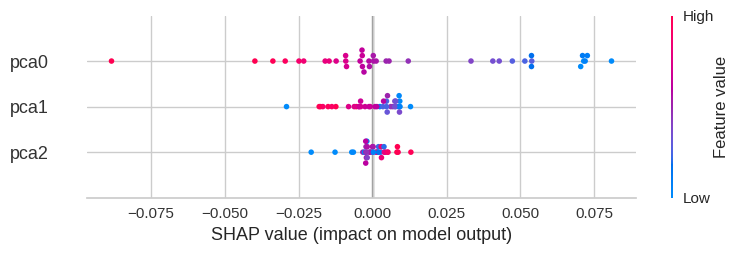

In [ ]:
interpret_model(tuned_et_pca, plot='summary')


In [4]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

NameError: ignored

In [ ]:
interpret_model(tuned_et_pca, plot='reason')